In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import pandas as pd
import numpy as np

In [3]:
iris=datasets.load_iris()

X=pd.DataFrame(iris.data)
X.columns=['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']

Y=pd.DataFrame(iris.target)
Y.columns=['Targets']

In [4]:
model=KMeans(n_clusters=3)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [5]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [6]:
plt.figure(figsize=(14,7))

<Figure size 1008x504 with 0 Axes>

<Figure size 1008x504 with 0 Axes>

In [8]:
colormap=np.array(['red','lime','black'])

Text(0.5, 1.0, 'Real Classification')

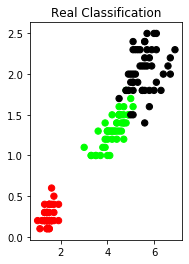

In [10]:
plt.subplot(1,2,1)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[Y.Targets],s=40)
plt.title('Real Classification')

Text(0.5, 1.0, 'K Mean Classification')

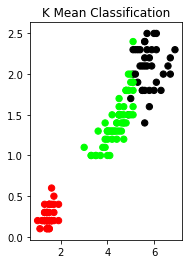

In [11]:
plt.subplot(1,2,2)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[model.labels_],s=40)
plt.title('K Mean Classification')

In [12]:
plt.figure(figsize=(14,7))

predY=np.choose(model.labels_,[0,1,2]).astype(np.int64)
print(predY)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


<Figure size 1008x504 with 0 Axes>

Text(0.5, 1.0, 'K Mean Classification')

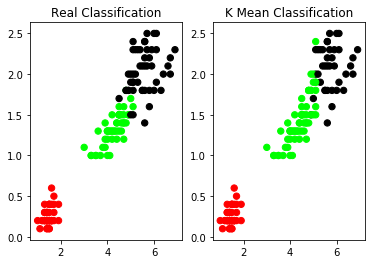

In [13]:
plt.subplot(1,2,1)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[Y.Targets],s=40)
plt.title('Real Classification')

plt.subplot(1,2,2)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[predY],s=40)
plt.title('K Mean Classification')

In [14]:
print("The accuracy score of K-Mean : ",sm.accuracy_score(Y,model.labels_))
print("The Confusion matrix of K-Mean : ",sm.confusion_matrix(Y,model.labels_))

The accuracy score of K-Mean :  0.8933333333333333
The Confusion matrix of K-Mean :  [[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]


In [15]:
from sklearn import preprocessing
scaler=preprocessing.StandardScaler()
scaler.fit(X)
xsa=scaler.transform(X)
xs=pd.DataFrame(xsa,columns=X.columns)

In [17]:
from sklearn.mixture import GaussianMixture
gmm=GaussianMixture(n_components=3)
gmm.fit(xs)

y_cluster_gmm=gmm.predict(xs)

Text(0.5, 1.0, 'GMM Classification')

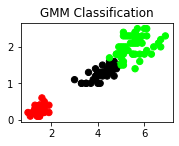

In [18]:
plt.subplot(2,2,3)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y_cluster_gmm],s=40)
plt.title('GMM Classification')

In [19]:
print("The accuracy score of EM : ",sm.accuracy_score(Y,y_cluster_gmm))
print("The Confusion matrix of EM : ",sm.confusion_matrix(Y,y_cluster_gmm))

The accuracy score of EM :  0.36666666666666664
The Confusion matrix of EM :  [[50  0  0]
 [ 0  5 45]
 [ 0 50  0]]
